In [1]:
your_name = "Myles Sartor"
your_uid = "119017708"
received_help_from = ""

# Assignment 1: Data Manipulation with Pandas

## Course: Data Sources and Manipulation

### Learning Objectives
In this assignment, you will practice fundamental data manipulation skills using pandas:
- Filtering data based on conditions
- Aggregating data with groupby operations
- Creating new columns through transformations
- Combining multiple operations for data analysis
- Creating visualizations to communicate findings

### Note on AI Assistance
You are **encouraged** to use AI assistants like ChatGPT, Claude, or Copilot to help you learn and complete this assignment. Please document your experience with AI tools in Question 5. This helps us understand how students are learning and improve the course.

---

## Dataset Description

Let's practice our data manipulation skills on a restaurant rating dataset. The dataset consists of several CSV files:

- `ratings.csv` -- consumers' ratings for restaurants
- `userprofile.csv` -- consumers' profile information
- `cuisine.csv` -- the cuisine types provided by each restaurant

Let's start by loading the data and examining the first few rows of each table.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data to dataframe
ratings = pd.read_csv('https://raw.githubusercontent.com/aiwei/inst414-21s/main/restaurant/ratings.csv')
userprofile = pd.read_csv('https://raw.githubusercontent.com/aiwei/inst414-21s/main/restaurant/userprofile.csv')
cuisine = pd.read_csv('https://raw.githubusercontent.com/aiwei/inst414-21s/main/restaurant/cuisine.csv')

---

## Question 1: Data Filtering (20 points)

To better understand users' preferences, we often need to examine subsets of users meeting certain criteria. Let's practice using filtering to select specific rows from a DataFrame.

In [4]:
# Example: we can use the following code to examine users who listed "retro" as their interest
userprofile[userprofile.interest == "retro"]

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
12,U1013,22.174624,-100.993873,False,abstemious,no preference,friends,public,widow,independent,1982,retro,thrifty-protector,none,professional,blue,80,medium,1.75
16,U1017,18.952615,-99.201616,False,casual drinker,formal,family,public,single,NaN,1991,retro,hunter-ostentatious,none,professional,orange,79,medium,1.79
26,U1027,22.165150,-100.987015,True,social drinker,no preference,NaN,public,single,independent,1989,retro,thrifty-protector,Catholic,student,purple,60,low,1.65
45,U1046,22.144415,-100.933097,False,social drinker,no preference,friends,car owner,single,independent,1990,retro,hard-worker,Catholic,student,black,82,medium,1.84
46,U1047,22.142429,-100.949147,False,abstemious,no preference,family,public,single,independent,1992,retro,thrifty-protector,Catholic,student,purple,60,medium,1.63
135,U1136,22.149607,-100.997235,True,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60


**Your Task:** Write code to filter the `userprofile` dataframe to show users with specific weights. Then answer the questions below.

1. How many users weigh 50 kg?
2. How many users weigh 80 kg?

In [5]:
# YOUR CODE HERE - Filter users who weigh 50 kg

users_50kg = userprofile[userprofile.weight == 50]
print(f"{len(users_50kg)}")

5


In [6]:
# YOUR CODE HERE - Filter users who weigh 80 kg

users_80kg = userprofile[userprofile.weight == 80]
print(f"{len(users_80kg)}")

4


**Answer:** *(Double-click to edit this cell)*

There are 5 users who weigh 50 kg and 4 users who weigh 80 kg.

---

## Question 2: Aggregation and Grouping (20 points)

Now let's practice aggregation functions. Aggregation allows us to compute summary statistics for different groups in our data.

In [7]:
# Example: we can use the following code to obtain the max height of all users
userprofile.height.max()

np.float64(2.0)

**Your Task:** Use the `groupby()` function to calculate the mean height for each `transport` mode in the `userprofile` dataset. Then answer the questions below.

1. Which transport mode has the tallest average height?
2. Which transport mode has the shortest average height?

In [8]:
# YOUR CODE HERE - Use groupby to calculate mean height for each transport mode

height_by_transport_mode = userprofile.groupby('transport')['height'].mean().sort_values(ascending=False)
print(height_by_transport_mode)

tallest_transport = height_by_transport_mode.index[0]
tallest_height = height_by_transport_mode.iloc[0]
shortest_transport = height_by_transport_mode.index[-1]
shortest_height = height_by_transport_mode.iloc[-1]

print(f"\nTallest: {tallest_transport}, {tallest_height:.2f}")
print(f"Shortest: {shortest_transport}, {shortest_height:.2f}")

transport
car owner    1.688000
on foot      1.680714
public       1.673537
Name: height, dtype: float64

Tallest: car owner, 1.69
Shortest: public, 1.67


**Answer:** *(Double-click to edit this cell)*

The ___ group has the tallest average height of ___ meters, while the ___ group has the shortest average height of ___ meters.

---

## Question 3: Transformation with Multiple Methods (25 points)

Let's practice creating new columns through transformations. We'll calculate the **Body Mass Index (BMI)** for users in the `userprofile` dataset using two different approaches.

**BMI Formula:** According to the [CDC](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html), the formula for BMI using the metric system is:

$$\text{BMI} = \frac{\text{weight (kg)}}{\text{[height (m)]}^2}$$

*It is your job to figure out how to apply this formula to our dataset based on the units used in the data.*

### Part A: Vectorized Operations (12.5 points)

Calculate BMI using **vectorized operations** (i.e., operating directly on the columns without using `.apply()`). Store your result as a new column named `bmi`.

In [9]:
# YOUR CODE HERE - Calculate BMI using vectorized operations
userprofile['bmi'] = userprofile['weight'] / (userprofile['height'] ** 2)



### Part B: Using .apply() Method (12.5 points)

Now calculate BMI using the **`.apply()`** method. Store your result as a new column named `bmi_apply`.

**Hint:** You'll need to define a function that calculates BMI for a single row, then use `.apply()` to apply that function across all rows.

In [10]:
# YOUR CODE HERE - Calculate BMI using .apply() method
# You may need to define a function first, then use .apply()
def calculate_bmi(row):
    return row['weight'] / (row['height'] ** 2)

userprofile['bmi_apply'] = userprofile.apply(calculate_bmi, axis=1)


### Sanity Check

Run the following code to verify that both methods produce the same results. If they match, you've successfully calculated BMI using both approaches!

In [11]:
# Sanity check - this should return True if both methods produce the same results
# Note: We use allclose() instead of == to account for potential floating-point precision differences
np.allclose(userprofile['bmi'], userprofile['bmi_apply'])

True

---

## Question 4: Multi-step Analysis with Visualization (25 points)

Now let's combine what we've learned! We'll categorize users by their BMI and create visualizations to explore the data.

### Part A: BMI Categorization and Analysis (15 points)

Create a new column called `bmi_category` that categorizes users based on their BMI using the CDC guidelines:

- **Underweight**: BMI < 18.5
- **Healthy Weight**: 18.5 ≤ BMI < 25
- **Overweight**: 25 ≤ BMI < 30
- **Obese**: BMI ≥ 30

Then calculate the **count** and **percentage** of users in each category.

In [12]:
# YOUR CODE HERE - Create bmi_category column and calculate counts/percentages

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

userprofile['bmi_category'] = userprofile['bmi'].apply(categorize_bmi)


bmi_counts = userprofile['bmi_category'].value_counts()
bmi_percentages = (userprofile['bmi_category'].value_counts(normalize=True) * 100).round(2)

print("Counts:")
print(bmi_counts)
print("\nPercentages:")
print(bmi_percentages)

Counts:
bmi_category
Healthy Weight    82
Overweight        29
Underweight       16
Obese             11
Name: count, dtype: int64

Percentages:
bmi_category
Healthy Weight    59.42
Overweight        21.01
Underweight       11.59
Obese              7.97
Name: proportion, dtype: float64


### Part B: Visualization (10 points)

Create a visualization of the BMI distribution. 

**Note:** We haven't explicitly taught visualization yet, but it's a great skill to learn through practice! Try creating at least **two different types** of visualizations (e.g., bar plot, pie chart, histogram), then put your **favorite visualization** below and explain why you chose this type of visualization.

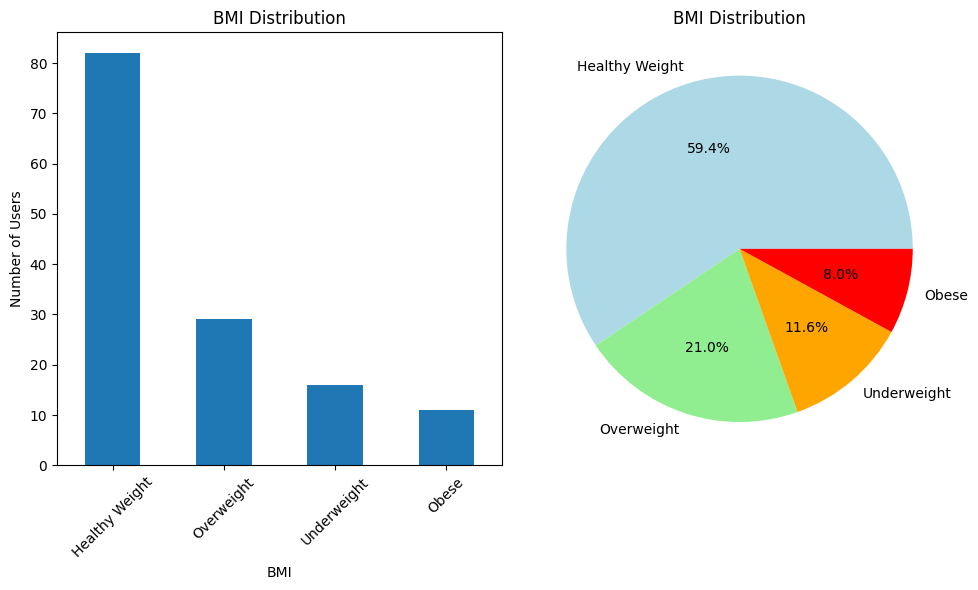

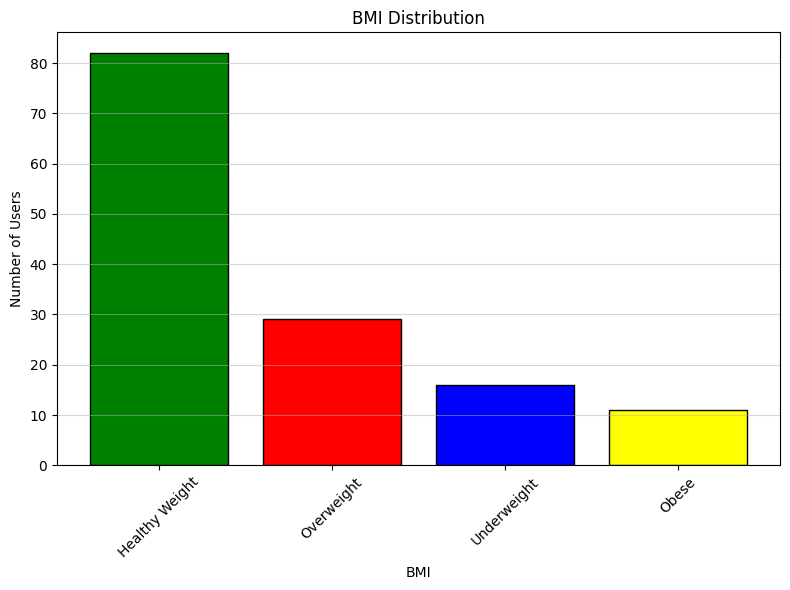

In [13]:
# YOUR CODE HERE - Put your favorite visualization here


plt.figure(figsize=(10, 6))

# bar plot
plt.subplot(1, 2, 1)
bmi_counts.plot(kind='bar')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# pie chart
plt.subplot(1, 2, 2)
colors = ['lightblue', 'lightgreen', 'orange', 'red']
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

# favorite visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(bmi_counts.index, bmi_counts.values, 
               color=['green', 'red', 'blue', 'yellow'],
               edgecolor='black')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Answer:** *(Double-click to edit this cell)*

I chose [type of visualization] because YOUR EXPLANATION HERE. 

Based on my analysis:
- 11.6% of users are underweight
- 59.4% of users are healthy weight
- 21.0% of users are overweight
- 8.0% of users are obese

---

## Question 5: AI Assistant Reflection (10 points)

Did you use any AI assistant (e.g., ChatGPT, Claude, Copilot) in completing this assignment? Please describe your experience:

- What prompts did you use?
- What answers did you receive?
- Were the answers helpful? Why or why not?
- Did you need follow-up conversations with the AI? What did you learn from that process?
- What aspects of working with pandas were easier or harder when using AI assistance?

If you did not use AI assistance, briefly explain your approach to solving the problems.

**Please limit your answer to 2-3 paragraphs.**

**Answer:** *(Double-click to edit this cell)*

YOUR RESPONSE HERE (2-3 paragraphs)

During this assignment, I approached each problem with a degree of understanding for what it was initially asking of me, but still utilized AI to verify and explore the functionality that was utilized in the approach so that I understood what was happening under the hood for the code. Prompts clarifying pandas syntax for groupby operations and inputs for different types of visualizations allowed me to really get a sense of what I needed to do for each question. When calculating percentages and counts directly, it was able to remind me of the importance of doing vector operations proprly before normalizing values and seeing BMI categorization logic on a barplot vs a pie chart. In addition, the AI answers told me how the sanity check worked for the apply methods vs the vectorized operations, but the understanding of the underlying concepts that implemented these solutions was a process that I still needed to go through myself. Although pandas functions I hadn't used much before were streamlined, helpful, and easier for syntax reminders and suggestions in coding, there were still more difficult aspects regarding the structure of the original data that was being manipulated by the AI's approaches. With that being said, the experience of learning what it is that I'm doing through AI was an invigorating experience that left me with valuable insights for the material. 

---

## Submission Instructions

Congratulations on finishing your first assignment! **Please follow these instructions to submit your homework:**

1. **Restart and rerun the entire notebook:** Click "Kernel" → "Restart & Run All" to ensure your code runs without errors and your results are reproducible. (If you're using Google Colab, click "Runtime" → "Restart and run all".)

2. **Verify your information:** Make sure your name and UID in the first cell are correct. If you received help from anyone, please list them in the first cell as well.

3. **Check visualizations:** Make sure all your visualizations render correctly in the notebook.

4. **Download and submit:** 
   - If using Jupyter Notebook: File → Download as → Notebook (.ipynb)
   - If using Google Colab: File → Download → Download .ipynb
   - Submit the `.ipynb` file to ELMS. You only need to submit the `.ipynb` file.